# Project 2: Sentiment Analysis on Women's E-commerce Clothing Reviews

In [ ]:
# Downloading the datasets from Kaggle
import pandas as pd

file_id = '1OESF36p5R3UeMdX6TFggkdkGRlUpmJAI'

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
data = pd.read_csv(download_link)

# Display the first few rows of the DataFrame
data.info(5)
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Exploratory Data Analysis (EDA)
### Performing data cleaning and preprocessing (handling missing values & removing duplicates).


In [ ]:
# Display the number of duplicates and missing values before cleaning
print("Before Cleaning:")
print("Number of duplicates:", data.duplicated().sum())
print("Number of missing values:")
print(data.isnull().sum())

Before Cleaning:
Number of duplicates: 0
Number of missing values:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [ ]:
# Fill missing titles with 'No Title'
data['Title'].fillna('No Title', inplace=True)

# Drop rows where 'Review Text' is missing
data.dropna(subset=['Review Text'], inplace=True)

# Fill missing values in 'Division Name', 'Department Name', and 'Class Name' with 'Unknown'
data[['Division Name', 'Department Name', 'Class Name']] = data[['Division Name', 'Department Name', 'Class Name']].fillna('Unknown')

# Display the number of missing values after cleaning
print("\nAfter Cleaning - Number of missing values:")
print(data.isnull().sum())


After Cleaning - Number of missing values:
Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [ ]:
# Merging the "Title" and "Review Text" columns
data['Merged Review'] = data['Title'].fillna('') + " " + data['Review Text'].fillna('')

data.info(5)
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22641 non-null  int64 
 1   Clothing ID              22641 non-null  int64 
 2   Age                      22641 non-null  int64 
 3   Title                    22641 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   22641 non-null  int64 
 6   Recommended IND          22641 non-null  int64 
 7   Positive Feedback Count  22641 non-null  int64 
 8   Division Name            22641 non-null  object
 9   Department Name          22641 non-null  object
 10  Class Name               22641 non-null  object
 11  Merged Review            22641 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.2+ MB


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Merged Review
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,No Title Absolutely wonderful - silky and sexy...
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,No Title Love this dress! it's sooo pretty. ...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


### Analyzing the distribution of reviews across different age groups, product categories, and ratings.

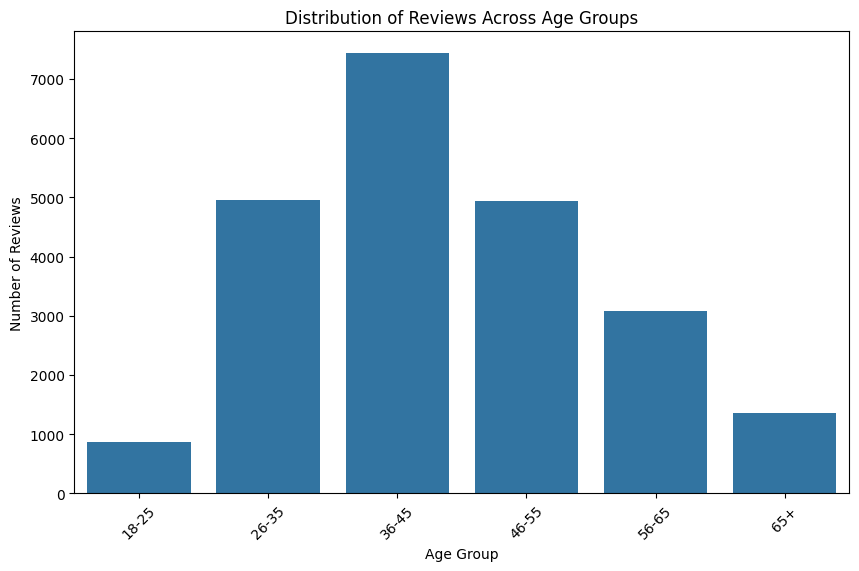

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age bins(intervals) and labels
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Plot distribution of reviews across age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=data, order=labels)
plt.title('Distribution of Reviews Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

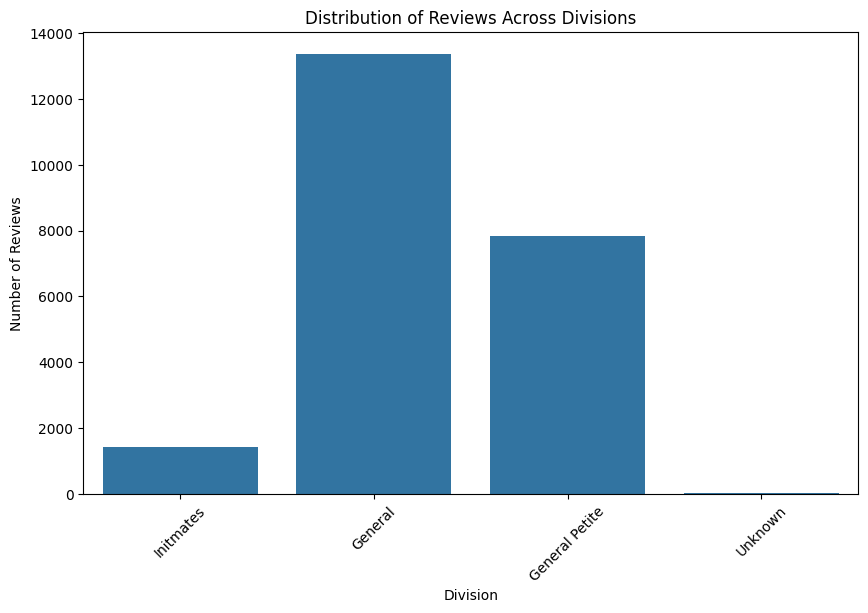

In [ ]:
# Plot for Division Name
plt.figure(figsize=(10, 6))
sns.countplot(x='Division Name', data=data)
plt.title('Distribution of Reviews Across Divisions')
plt.xlabel('Division')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

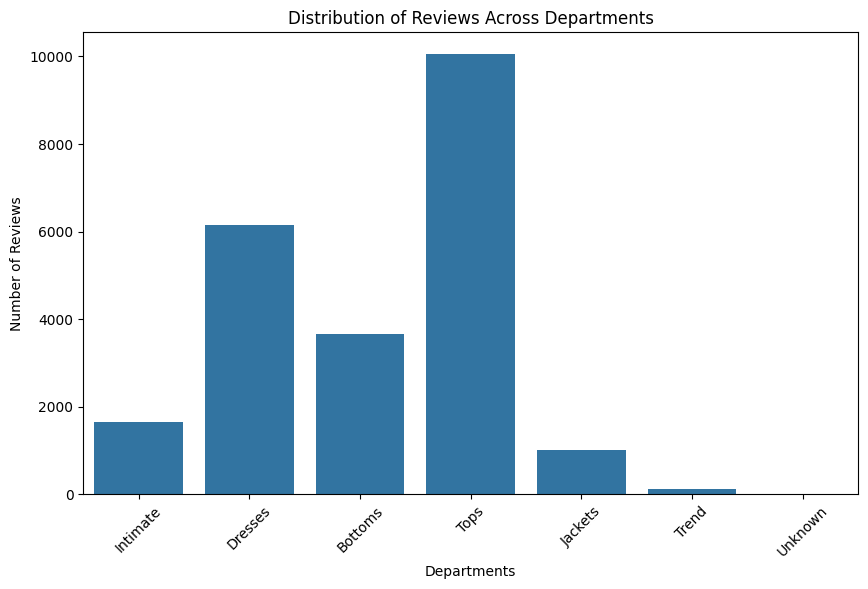

In [ ]:
# Plot for Department Name
plt.figure(figsize=(10, 6))
sns.countplot(x='Department Name', data=data)
plt.title('Distribution of Reviews Across Departments')
plt.xlabel('Departments')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

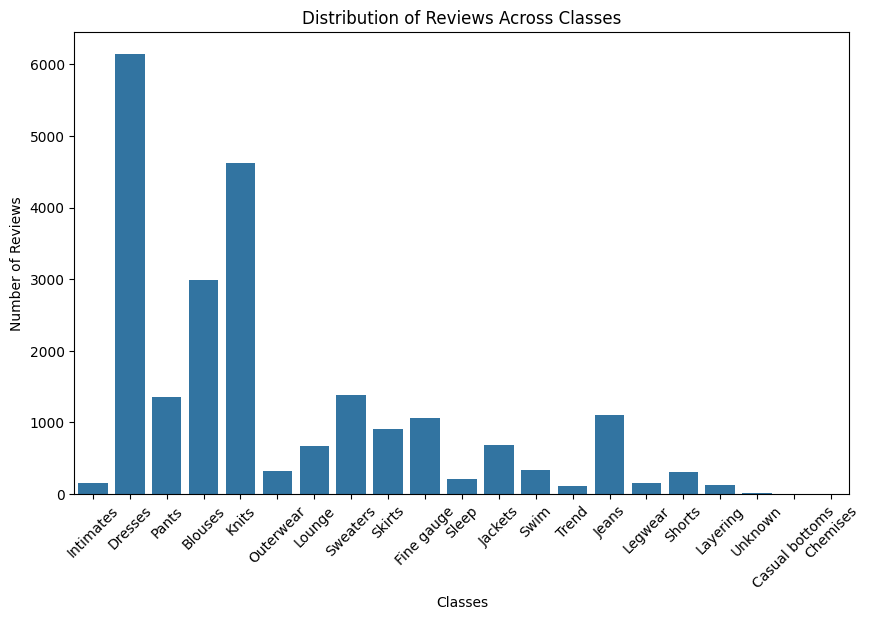

In [ ]:
# Plot for Class Name
plt.figure(figsize=(10, 6))
sns.countplot(x='Class Name', data=data)
plt.title('Distribution of Reviews Across Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

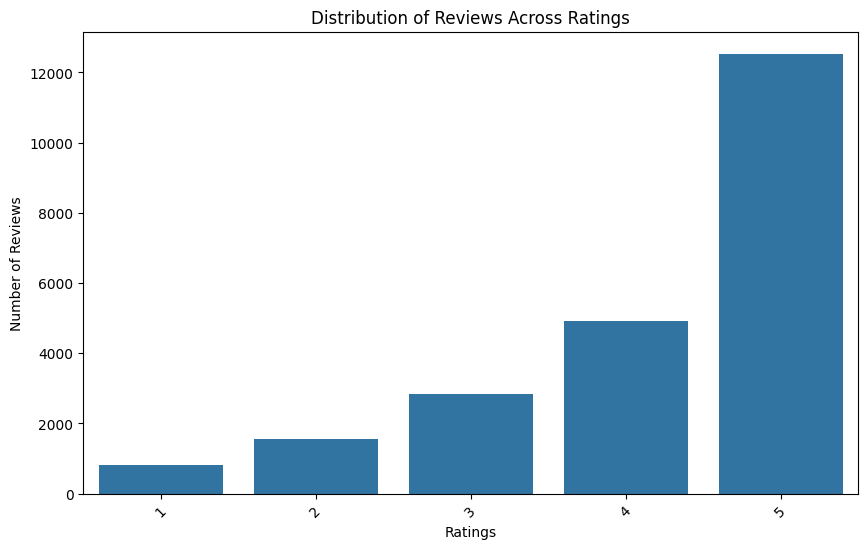

In [ ]:
# Plot for Class Name
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Reviews Across Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### Investigating the relationship between review sentiments, product recommendations, and positive feedback count.

We are using the TextBlob library for sentiment analysis, which offers a simple API to access its methods for processing textual data. TextBlob is built on top of NLTK and Pattern, providing an easy-to-use interface for performing various Natural Language Processing (NLP) tasks, including sentiment analysis. It is particularly useful for quickly obtaining polarity and subjectivity scores, which can help in understanding the general sentiment expressed in the text.

In [ ]:
# Use TextBlob to compute sentiment scores for each review.
from textblob import TextBlob

data['Sentiment Category'] = data['Merged Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Divide sentiment scores into categories as positive, neutral, and negative based on the compound score.
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

data['Sentiment Category'] = data['Sentiment Category'].apply(categorize_sentiment)

# Use TextBlob to compute sentiment scores for each review.
data['Sentiment'] = data['Merged Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

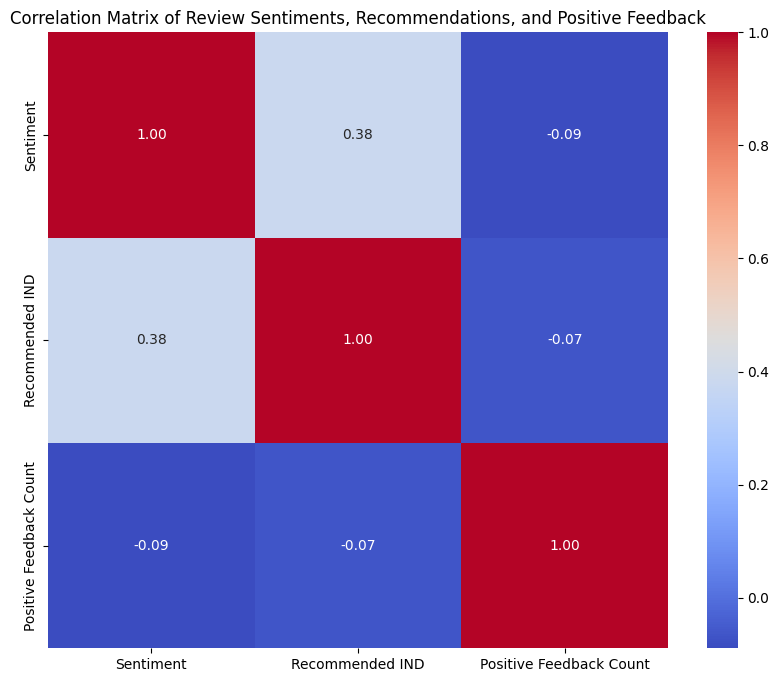

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[['Sentiment', 'Recommended IND', 'Positive Feedback Count']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Review Sentiments, Recommendations, and Positive Feedback')
plt.show()

### Visualizing the most common words or phrases in positive and negative reviews.


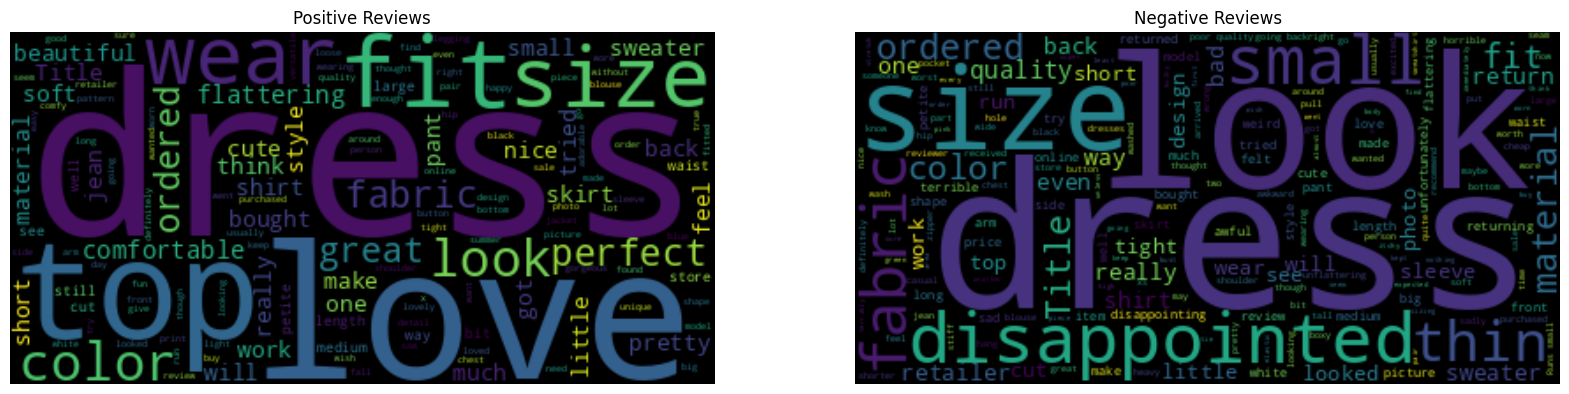

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews in each sentiment category into single strings
positive_reviews = ' '.join(data.loc[data['Sentiment Category'] == 'Positive', 'Merged Review'])
negative_reviews = ' '.join(data.loc[data['Sentiment Category'] == 'Negative', 'Merged Review'])


# Create WordCloud objects for positive and negative reviews
wordcloud_positive = WordCloud().generate(positive_reviews)
wordcloud_negative = WordCloud().generate(negative_reviews)

# Plotting the WordClouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title('Positive Reviews')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title('Negative Reviews')

plt.show()

## Sentiment Analysis Model
### Preprocessing text data for model ingestion (tokenization, stop-word removal, lemmatization, word embeddings)
#### 1.Uncontract the text

In [ ]:
import re
from tqdm import tqdm
def uncontract(text):
    text = re.sub(r"(\b)([Aa]re|[Cc]ould|[Dd]id|[Dd]oes|[Dd]o|[Hh]ad|[Hh]as|[Hh]ave|[Ii]s|[Mm]ight|[Mm]ust|[Ss]hould|[Ww]ere|[Ww]ould)n't", r"\1\2 not", text)
    text = re.sub(r"(\b)([Hh]e|[Ii]|[Ss]he|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'ll", r"\1\2 will", text)
    text = re.sub(r"(\b)([Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'re", r"\1\2 are", text)
    text = re.sub(r"(\b)([Ii]|[Ss]hould|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Ww]ould|[Yy]ou)'ve", r"\1\2 have", text)

    text = re.sub(r"(\b)([Cc]a)n't", r"\1\2n not", text)
    text = re.sub(r"(\b)([Ii])'m", r"\1\2 am", text)
    text = re.sub(r"(\b)([Ll]et)'s", r"\1\2 us", text)
    text = re.sub(r"(\b)([Tt]here)'s", r"\1\2 is", text)
    text = re.sub(r"(\b)([Ww])on't", r"\1\2ill not", text)
    text = re.sub(r"(\b)([Ss])han't", r"\1\2hall not", text)
    text = re.sub(r"(\b)([Yy])(?:'all|a'll)", r"\1\2ou all", text)

    return text

data['Merged Review'] = [uncontract(review) for review in tqdm(data['Merged Review'])]

positive_reviews = data.loc[data['Sentiment Category'] == 'Positive', 'Merged Review']
neutral_reviews = data.loc[data['Sentiment Category'] == 'Neutral', 'Merged Review']
negative_reviews = data.loc[data['Sentiment Category'] == 'Negative', 'Merged Review']

100%|██████████| 22641/22641 [00:05<00:00, 4485.79it/s]


#### 2.Tokenization

In [ ]:
import re, string, nltk, itertools

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize the reviews in the 'Merged Review' column
review_tokens = [word_tokenize(uncontract(review)) for review in tqdm(data['Merged Review'])]

100%|██████████| 22641/22641 [00:22<00:00, 1016.72it/s]


In [ ]:
', '.join(review_tokens[100])

'Not, a, fan, The, fabric, felt, cheap, and, i, did, not, find, it, to, be, a, flattering, top, ., for, reference, i, am, wearing, a, medium, in, the, photos, and, my, measurements, are, 38-30-40, .'

We need to properly normalize the identified tokens in order to capture more clear information about the reviews. The normalization step will significantly reduce the dimensionality of the vocabulary, and help us understand better the corpus.

#### 3.Normalization


Convert all the tokens to lowercase.

In [ ]:
review_clean_tokens = [[t.lower() for t in tokens] for tokens in review_tokens]

In [ ]:
', '.join(review_clean_tokens[100])

'not, a, fan, the, fabric, felt, cheap, and, i, did, not, find, it, to, be, a, flattering, top, ., for, reference, i, am, wearing, a, medium, in, the, photos, and, my, measurements, are, 38-30-40, .'


Remove all the tokens that consist only of punctiuation characters.

In [ ]:
no_punct = []

# Create a set of all punctuation and digit characters for quick lookup
punctuations = set(string.punctuation).union(set(string.digits))

# Go through each list of tokens (each review) and filter out punctuation
for tokens in tqdm(review_clean_tokens):
    filtered_tokens = [t for t in tokens if not all(c in punctuations or c.isdigit() for c in t)]
    no_punct.append(filtered_tokens)

review_clean_tokens = no_punct

100%|██████████| 22641/22641 [00:00<00:00, 23926.40it/s]


Remove Stop-Words

To remove the tokens that are stop-words, we will be using the `stopwords` corpora from `NLTK`.

In [ ]:
# Create the stop word regular expression
stop_word_regex = '|'.join(['^{}$'.format(re.escape(s)) for s in stopwords.words('english')])

# Apply the regex substitution to each token within each sublist
review_clean_tokens = [
    [token for token in review if not re.match(stop_word_regex, token)]
    for review in review_clean_tokens
]

#### 4.POS Tagging

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the reviews and apply POS tagging
review_pos_tags = [pos_tag(tokens) for tokens in review_clean_tokens]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 5.Lemmatization

For lemmatization we will use the `WordNetLemmatizer` from the `nltk.stem` module.

This lemmatizer requires the `wordnet` and `omw-1.4` corpora from `NLTK`.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word with its POS tag
def lemmatize_with_pos(token, pos):
    return lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos))

# Lemmatize with POS tags
lemma_review = [[lemmatize_with_pos(token, pos) for token, pos in tagged_tokens]
                for tagged_tokens in review_pos_tags]

Here words like "dress", "sweater", "color", "fabric", "size", "order", "look" & "wear" which don't carry a sentiment meaning are removed.

In [ ]:
# List of words to remove
extra_words = {"dress", "sweater", "color", "fabric", "size", "order", "look", "wear"}

# Remove unwanted words after lemmatization
lemma_review = [[token for token in review if token.lower() not in extra_words]
                         for review in lemma_review]

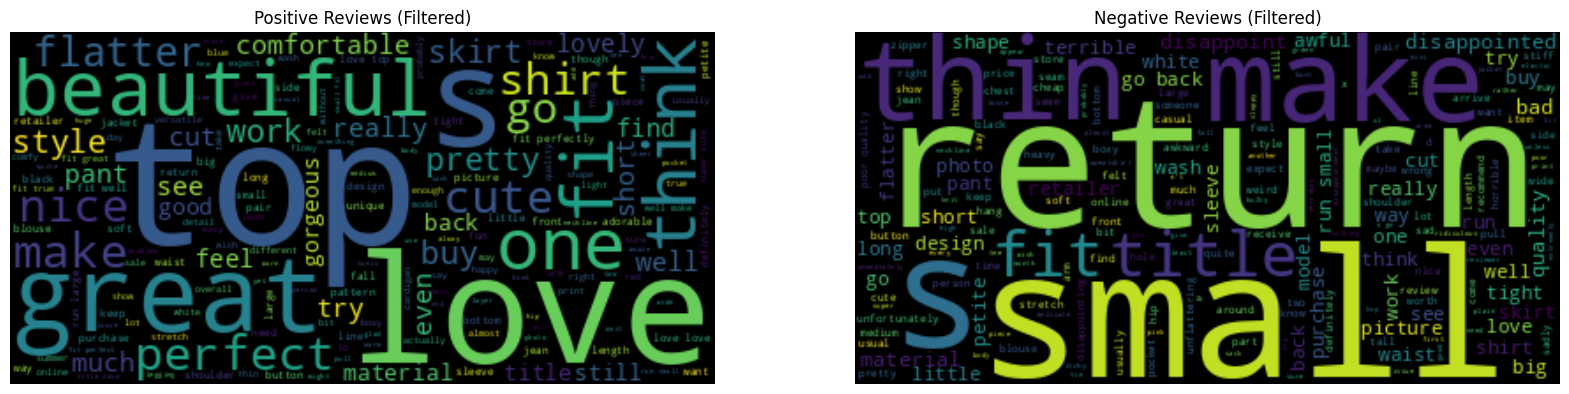

In [ ]:
# Recreate a DataFrame with the filtered lemmatized reviews and the sentiment categories
filtered_data = pd.DataFrame({
    'Lemmatized Review': [' '.join(review) for review in lemma_review],
    'Sentiment Category': data['Sentiment Category']
})

# Concatenate all filtered lemmatized reviews in each sentiment category into single strings
positive_reviews_filtered = ' '.join(filtered_data.loc[filtered_data['Sentiment Category'] == 'Positive', 'Lemmatized Review'])
negative_reviews_filtered = ' '.join(filtered_data.loc[filtered_data['Sentiment Category'] == 'Negative', 'Lemmatized Review'])

# Create WordCloud objects for positive and negative reviews
wordcloud_positive_filtered = WordCloud().generate(positive_reviews_filtered)
wordcloud_negative_filtered = WordCloud().generate(negative_reviews_filtered)

# Plotting the WordClouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_positive_filtered, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title('Positive Reviews (Filtered)')

axes[1].imshow(wordcloud_negative_filtered, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title('Negative Reviews (Filtered)')

plt.show()

#### 6.Countvectorizer

In [ ]:
# Convert each list of tokens back into a sentence
lemmatized_sentences = [' '.join(tokens) for tokens in lemma_review]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

y = data['Sentiment Category'].values

# Split dataset into training and testing sets
X_train_cv, X_test_cv, y_train, y_test = train_test_split(lemmatized_sentences, y, test_size=0.2, random_state=42)

def extract_ngrams(data, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(
        ngram_range=ngram_range,
        max_features=1000,
        min_df=10,
        max_df=0.8
    )

    # The CountVectorizer fit_transform method expects raw text data,
    # since the data is already preprocessed and tokenized, we can use it directly.
    X = vectorizer.fit_transform(data)

    return X, vectorizer

# Now, we will extract n-grams from the training data
train_vec, train_bow = extract_ngrams(X_train_cv, ngram_range=(1, 3))

# And transform our test data using the same vectorizer
test_vec = train_bow.transform(X_test_cv)

#### 7.TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split your dataset into training and testing sets
X_train_tf, X_test_tf, y_train, y_test = train_test_split(lemmatized_sentences, y, test_size=0.2, random_state=42)

def extract_ngrams(data, ngram_range=(1, 1), max_features=1000):
    tfidf = TfidfVectorizer(
        ngram_range=ngram_range,
        max_features=max_features,
        preprocessor=None,
        tokenizer=None,
        min_df=10,
        max_df=0.8
    )

    # The TfidfVectorizer fit_transform method expects raw text data,
    # since the data is already preprocessed and tokenized, we can use it directly.
    X = tfidf.fit_transform(data)

    return X, tfidf

# Apply TF-IDF to train data
train_vecs, train_tfidf = extract_ngrams(X_train_tf, ngram_range=(1, 3))

# Transform the test data using the same TF-IDF vectorizer
test_vecs = train_tfidf.transform(X_test_tf)

#### 8.Word Embeddings

Let's install the sentence-transformers library which is a Python package that simplifies the process of obtaining sentence embeddings. The -U flag ensures that if the package is already installed, it's updated to the latest version. The library offers an easy and efficient way to use state-of-the-art transformer models.

In [ ]:
from IPython.display import clear_output

# Install the Sentence-Transformers Library
!pip install -U sentence-transformers
clear_output()

Now let's import the `SentenceTransformer` class from the sentence-transformers package. This class is used to load pre-trained models and generate embeddings. The model specified by `sentence-transformers/average_word_embeddings_glove.6B.300d` is loaded, which uses `GloVe` (Global Vectors for Word Representation) embeddings with a dimensionality of 300. GloVe is an unsupervised learning algorithm for obtaining vector representations for words, trained on aggregate global word-word co-occurrence statistics from a corpus. This particular model averages GloVe word embeddings to create sentence embeddings.

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('sentence-transformers/average_word_embeddings_glove.6B.300d')

# Generate embeddings for lemmatized sentences
embeddings = model.encode(lemmatized_sentences)

clear_output()
print(embeddings)

[[ 0.02946983 -0.09665284  0.03741532 ...  0.059576   -0.12246782
   0.09156084]
 [-0.14418468  0.04245108 -0.1278082  ... -0.00521911  0.07620157
   0.09685011]
 [-0.14551732  0.14549547 -0.08855791 ... -0.11391472  0.04428026
  -0.04354031]
 ...
 [-0.24672592  0.20053801 -0.24023518 ...  0.07011763  0.07235841
  -0.0305717 ]
 [-0.18104354  0.05860326 -0.08301875 ... -0.06001122  0.03698907
   0.0851543 ]
 [-0.07954782  0.05448664 -0.07115028 ... -0.13137482  0.02687263
   0.07597791]]


## Training a sentiment analysis model to classify reviews into positive, neutral, or negative sentiments.


#### Word Embeddings

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train_we, X_test_we, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression(max_iter=1000)

# Fit the classifier to the training data
clf.fit(X_train_we, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class_we = clf.predict(X_test_we)

## Evaluating model performance using appropriate metrics (accuracy, precision, recall, F1-Score).

#### Word Embeddings

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class_we))

              precision    recall  f1-score   support

    Negative       0.83      0.21      0.34        70
     Neutral       0.56      0.34      0.42       591
    Positive       0.90      0.97      0.94      3868

    accuracy                           0.88      4529
   macro avg       0.77      0.51      0.57      4529
weighted avg       0.86      0.88      0.86      4529





```
# This is formatted as code
```

#### Countvectorizer

In [ ]:
clf.fit(train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class_cv = clf.predict(test_vec)

In [ ]:
print(classification_report(y_test, y_pred_class_cv))

              precision    recall  f1-score   support

    Negative       0.42      0.36      0.38        70
     Neutral       0.64      0.52      0.58       591
    Positive       0.93      0.96      0.95      3868

    accuracy                           0.90      4529
   macro avg       0.66      0.61      0.64      4529
weighted avg       0.89      0.90      0.89      4529



In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

# Convert csr_matrix to DataFrame
X_train_df = pd.DataFrame(train_vec.toarray(), columns=train_bow.get_feature_names_out())
X_test_df = pd.DataFrame(test_vec.toarray(), columns=train_bow.get_feature_names_out())

clf1 = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf1.fit(X_train_df, X_test_df, y_train, y_test)
models

 97%|█████████▋| 28/29 [20:04<01:09, 69.94s/it] 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4551
[LightGBM] [Info] Number of data points in the train set: 18112, number of used features: 1000
[LightGBM] [Info] Start training from score -4.039139
[LightGBM] [Info] Start training from score -1.995195
[LightGBM] [Info] Start training from score -0.166763


100%|██████████| 29/29 [20:10<00:00, 41.73s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.83,0.64,None,0.84,1.22
NearestCentroid,0.76,0.63,None,0.80,1.07
LogisticRegression,0.89,0.62,None,0.89,12.44
LinearSVC,0.88,0.59,None,0.88,102.19
GaussianNB,0.61,0.59,None,0.69,1.33
SGDClassifier,0.89,0.57,None,0.88,34.94
Perceptron,0.88,0.56,None,0.87,3.17
LinearDiscriminantAnalysis,0.87,0.55,None,0.87,9.12
PassiveAggressiveClassifier,0.88,0.55,None,0.88,5.43


#### TF-IDF

In [ ]:
clf.fit(train_vecs, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_class_tf = clf.predict(test_vecs)

In [ ]:
print(classification_report(y_test, y_pred_class_tf))

              precision    recall  f1-score   support

    Negative       0.57      0.06      0.10        70
     Neutral       0.68      0.42      0.52       591
    Positive       0.92      0.98      0.95      3868

    accuracy                           0.90      4529
   macro avg       0.72      0.49      0.52      4529
weighted avg       0.88      0.90      0.88      4529



Applying BERT model on raw text to compare results with word2vec model

In [ ]:
bert_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Using the 'Merged Review' column directly
raw_sentences = data['Merged Review'].tolist()

raw_embeddings = model.encode(raw_sentences)

In [ ]:
# Split the dataset for raw text embeddings
X_train_raw, X_test_raw, y_train, y_test = train_test_split(raw_embeddings, y, test_size=0.2, random_state=42)

clf.fit(X_train_raw, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict and evaluate
y_pred_raw = clf.predict(X_test_raw)
print("Classification Report for Raw Text Embeddings:")
print(classification_report(y_test, y_pred_raw))

Classification Report for Raw Text Embeddings:
              precision    recall  f1-score   support

    Negative       0.65      0.16      0.25        70
     Neutral       0.57      0.34      0.42       591
    Positive       0.90      0.97      0.94      3868

    accuracy                           0.88      4529
   macro avg       0.71      0.49      0.54      4529
weighted avg       0.86      0.88      0.86      4529

